# # The Sparks Foundation - Data Science & Business Analytics Intership

# Task 2 - Prediction Using Unsupervised ML

In this task we are going to predict the optimum number of clusters and represent it visually.

Dataset : https://bit.ly/3kXTdox

# Steps:

1. Importing the libraries
2. Reading Dataset
3. Analysing the data
4. Data visualization
5. Applying K-means algorithm 
6. Visualizing the Cluster

Author : Jidnyasa Bonde

# Importing the libraries

In [1]:
#importing required librarires

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Reading the dataset

Iris = pd.read_csv("Iris.csv")
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Analysing the data

In [3]:
# It shoes the first 5 numbers of rows

Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# It shoes the last 5 numbers of rows

Iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# It find the numnber of rows and columns

Iris.shape

(150, 6)

In [6]:
# It shows the statistical format of the dataset

Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# It shows the more information about the dataset

Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# It shows the null or missing values from the dataset

Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# It shows the unique values from the data 

Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Now we will drop the 'Id' column

X= pd.DataFrame(Iris)
Iris_X = Iris.drop(columns= ['Id'] )
Iris_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data visualization

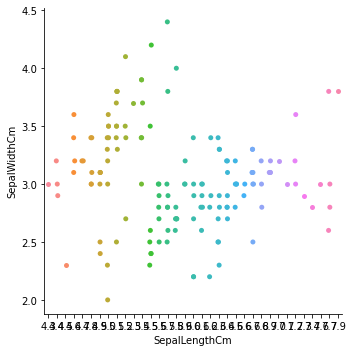

In [11]:
# Visualzing the SepalLengthCm Vs SepalWidthCm using catplot

sns.catplot("SepalLengthCm","SepalWidthCm",data=Iris)

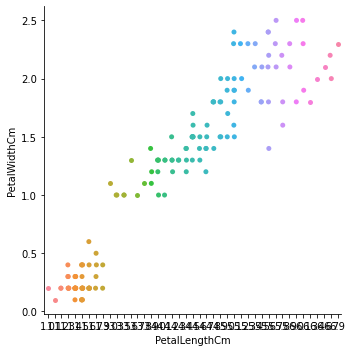

In [14]:
# Visualzing the PetalLengthCm Vs PetalWidthCm using catplot

sns.catplot("PetalLengthCm","PetalWidthCm",data=Iris)

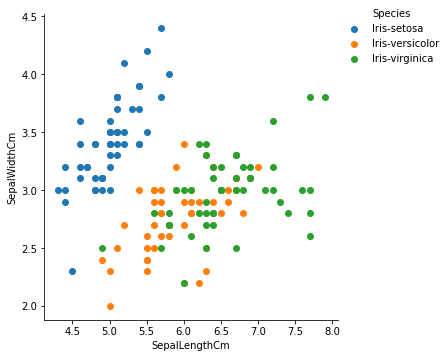

In [16]:
# Visualing the SepalLengthCm Vs SepalWidthCm using scatterplot

sns.FacetGrid(Iris,hue='Species',height=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend(loc="upper right")



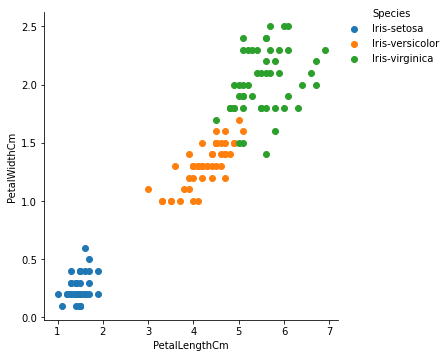

In [17]:
# Visualing the "PetalLengthCm","PetalWidthCm" using scatterplot

sns.FacetGrid(Iris,hue='Species',height=5)\
.map(plt.scatter,"PetalLengthCm","PetalWidthCm")\
.add_legend(loc="upper right")

From above observation we can say that petal length and petal width are bettter predictors because setosa is clearly seperable in later case.

#  Applying K-means algorithm to find the optimum number of clusters

In [18]:
#importing K-Means module

from sklearn.cluster import KMeans
print("Kmeans algorithm successfully imported")

Kmeans algorithm successfully imported


In [19]:
#Experimenting  with some values of  'K'  to deduce the optimal value

x = Iris.iloc[:,[0,1,2,3]].values
wcss =[] # WCSS is the sum of squared distance between each point and the centroid in a cluster.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # It Calculate the wcss




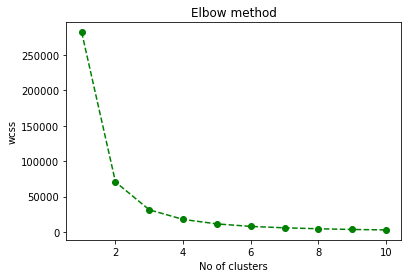

In [20]:
#Now plotting a graph which shows us 'elbow'  i.e.  a point after the graph changes from exponential to linear

plt.plot(range(1, 11), wcss,'go--', color='green')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss') # Within cluster sum of squares
plt.show()

ANow you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
Let’s implement k-means again using k=3

In [25]:
# Creating K-Means classifier 

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [26]:
#Merging into dataset

Iris['clusters']=y_kmeans
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [27]:
kmeans.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464]])

# Visualizing the Cluster

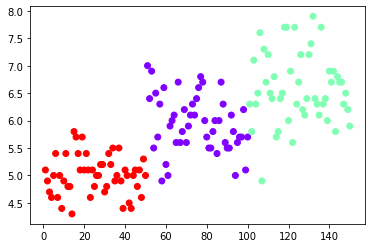

In [28]:
# Visualizing the Cluster using scatter plot

plt.scatter(x[:,0], x[:, 1],c=y_kmeans, cmap = "rainbow")

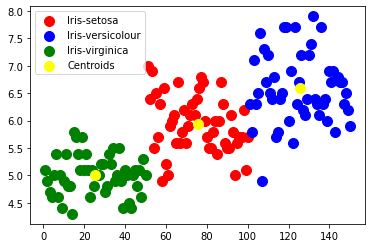

In [29]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Thank you so much